# **IN FIRST PROJECT OF TIME SERIES FORECASTING WE PREDICT THE MONTHLY BEER PRODUCTION IN AUSTRALIA USING ARIMA MODEL**

# **IMPORT PYTHON LIBRARIES**

In [141]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import sys
import pandas_datareader as pdr
import datetime
import tensorflow as tf
import keras
warnings.simplefilter(action='ignore')


# **LOAD OUR DATASET**

In [142]:
df = pd.read_csv("/content/monthly-beer-production-in-austr[1].csv")
df.head(10)

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
5,1956-06,64.8
6,1956-07,70.1
7,1956-08,77.3
8,1956-09,79.5
9,1956-10,100.6


In [143]:
df.tail(10)

,Month,Monthly beer production
466,1994-11,190.0
467,1994-12,182.0
468,1995-01,138.0
469,1995-02,136.0
470,1995-03,152.0
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


# **Plot The Diagram**

<Axes: >

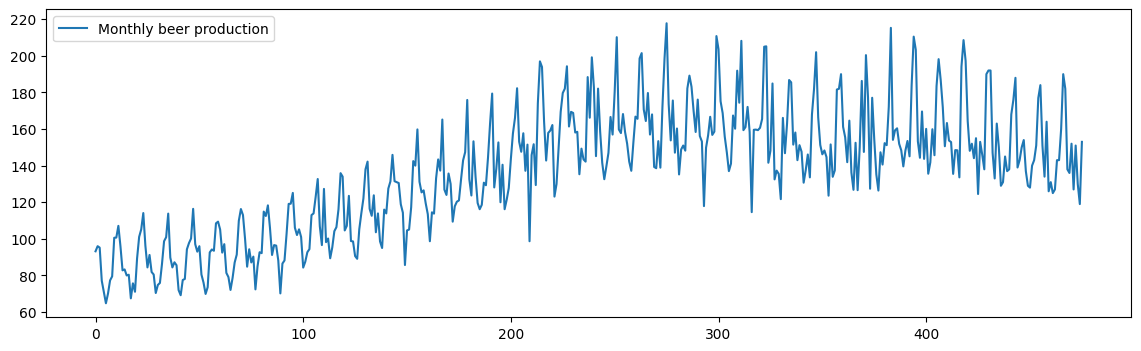

In [144]:
df.plot(figsize=(14,4))

# **APPLY EDA ON DATASET**


In [145]:
df.shape

(476, 2)

In [146]:
df.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

<Axes: >

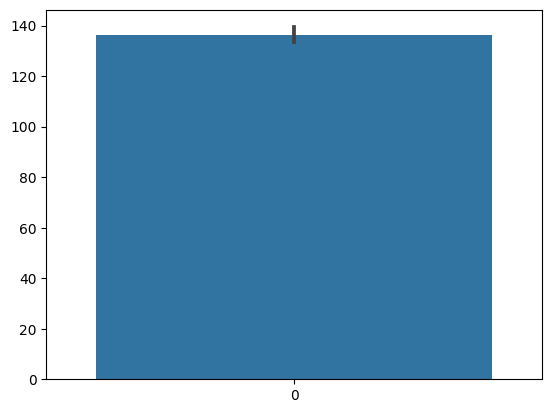

In [147]:
sns.barplot(df['Monthly beer production'])

In [148]:
df.corr()

,Monthly beer production
Monthly beer production,1.0


<Axes: >

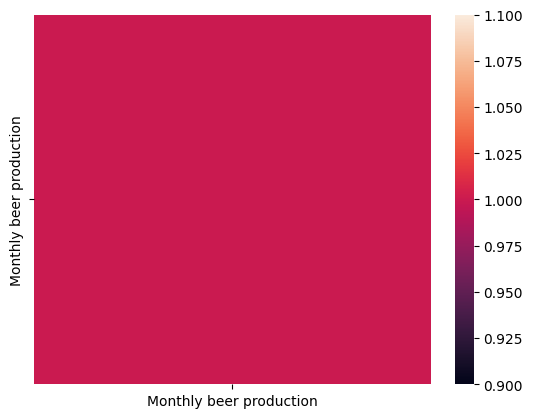

In [149]:
sns.heatmap(df.corr())

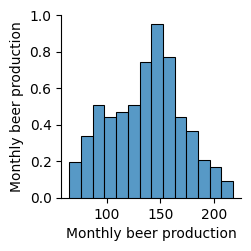

In [150]:
sns.pairplot(df)

<Axes: ylabel='Monthly beer production'>

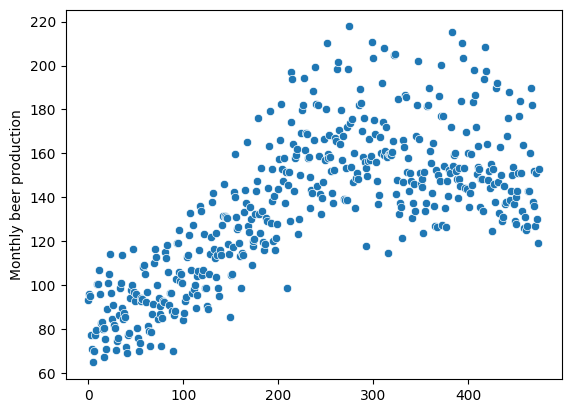

In [151]:
sns.scatterplot(df['Monthly beer production'])

<Axes: xlabel='Monthly beer production', ylabel='Density'>

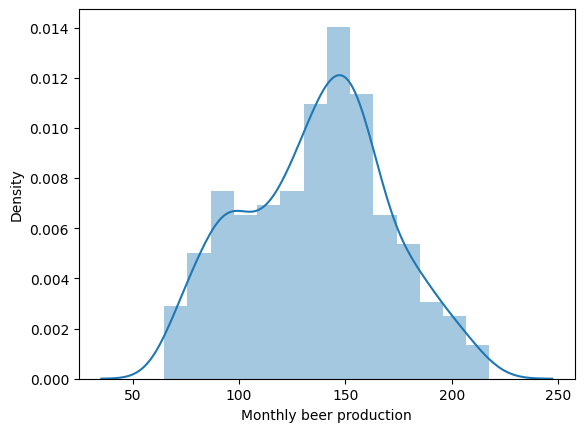

In [152]:
sns.distplot(df['Monthly beer production'])

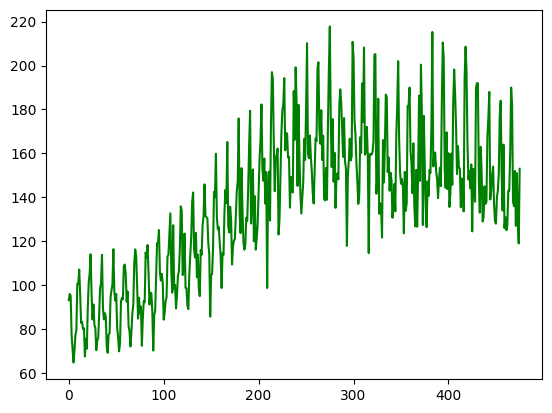

In [153]:
plt.plot(df['Monthly beer production'],c='green')

<Axes: >

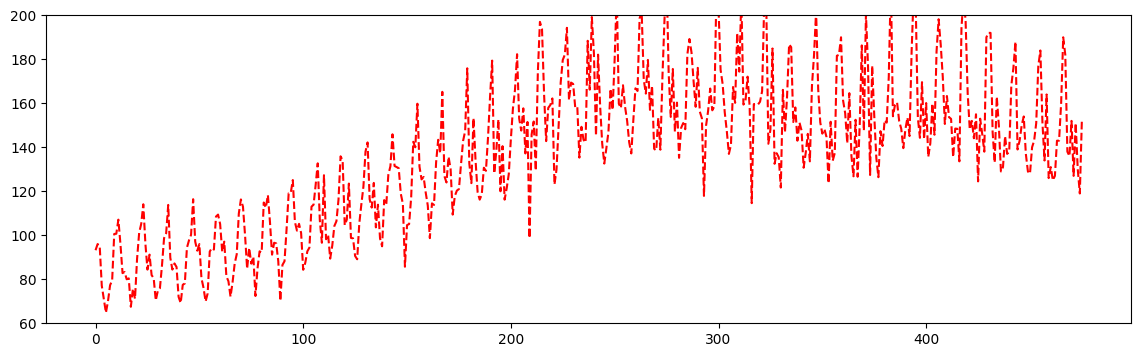

In [154]:
df['Monthly beer production'].plot(ylim=[60,200],figsize=(14,4),ls="--",c='red')

In [155]:
df.index

RangeIndex(start=0, stop=476, step=1)

# **Time Sampling**

In [156]:
df=df.set_index('Month',drop=True)

In [157]:
df.head(10)

,Monthly beer production
Month,
1956-01,93.2
1956-02,96.0
1956-03,95.2
1956-04,77.1
1956-05,70.9
1956-06,64.8
1956-07,70.1
1956-08,77.3
1956-09,79.5


# **APPLIED ROLLING FUNCTION**

In [158]:
df['Monthly beer production'].rolling(10).mean().head(20)

Month
1956-01      NaN
1956-02      NaN
1956-03      NaN
1956-04      NaN
1956-05      NaN
1956-06      NaN
1956-07      NaN
1956-08      NaN
1956-09      NaN
1956-10    82.47
1956-11    83.22
1956-12    84.33
1957-01    84.40
1957-02    84.97
1957-03    86.21
1957-04    87.73
1957-05    88.76
1957-06    87.78
1957-07    87.40
1957-08    84.45
Name: Monthly beer production, dtype: float64

<Axes: xlabel='Month'>

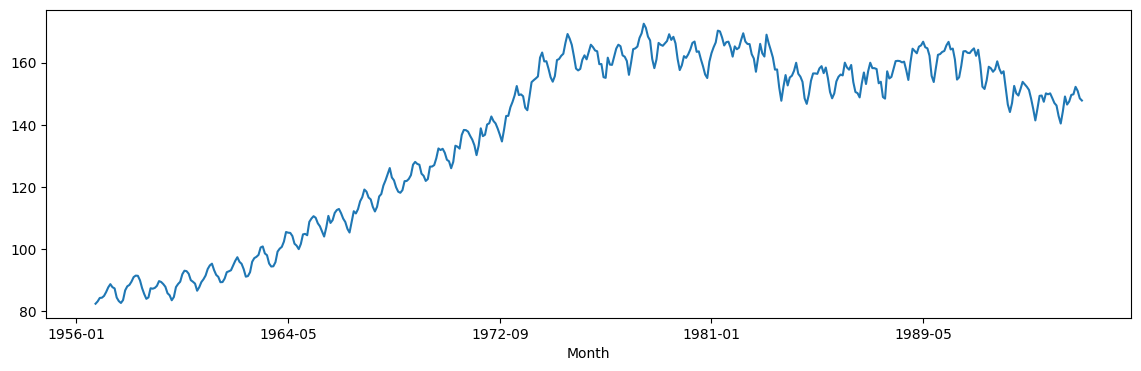

In [159]:
df['Monthly beer production'].rolling(10).mean().plot(figsize=(14,4))

In [160]:
df['Monthly beer production:30 days rolling'] = df['Monthly beer production'].rolling(30).mean()

<Axes: xlabel='Month'>

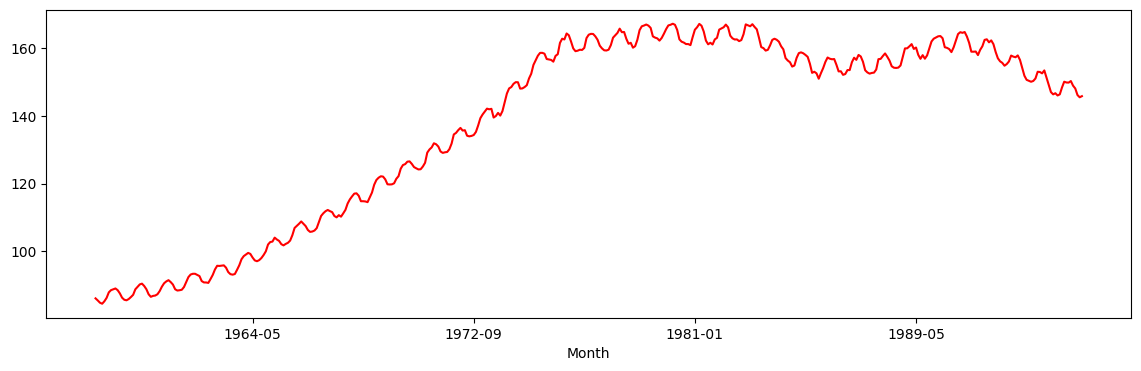

In [161]:
df['Monthly beer production:30 days rolling'].plot(c='red',figsize=(14,4))

<Axes: xlabel='Month'>

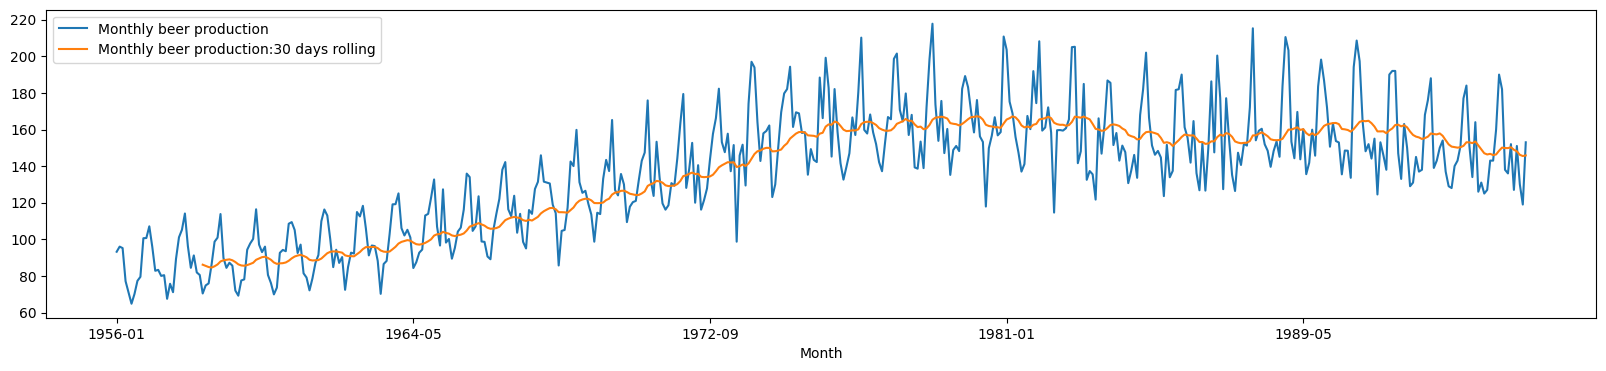

In [162]:
df[['Monthly beer production','Monthly beer production:30 days rolling']].plot(figsize=(20,4))

# **EXPANDING THE DATA  FOR COMMULATIVE MOVING AVERAGE**

<Axes: xlabel='Month'>

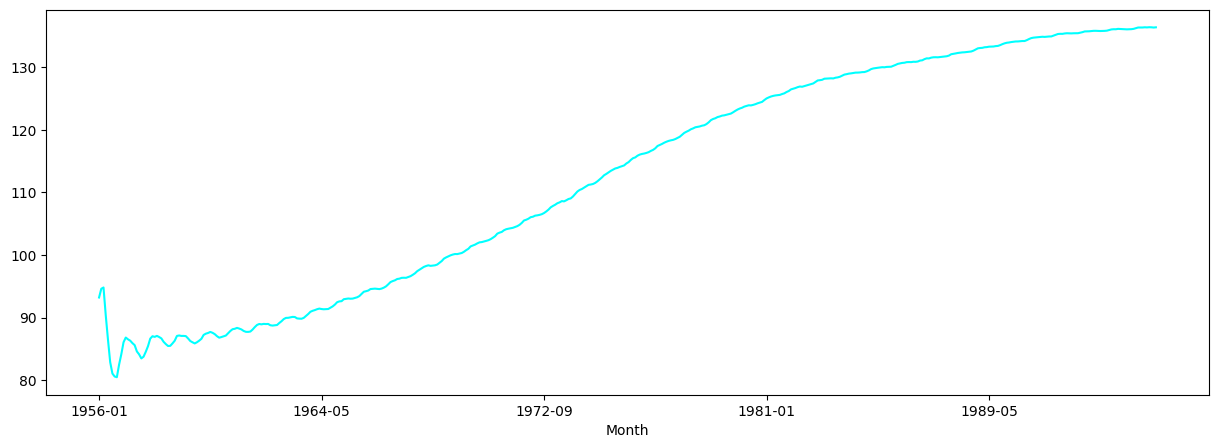

In [163]:
df['Monthly beer production'].expanding().mean().plot(figsize=(15,5),c='cyan')

<Axes: xlabel='Month'>

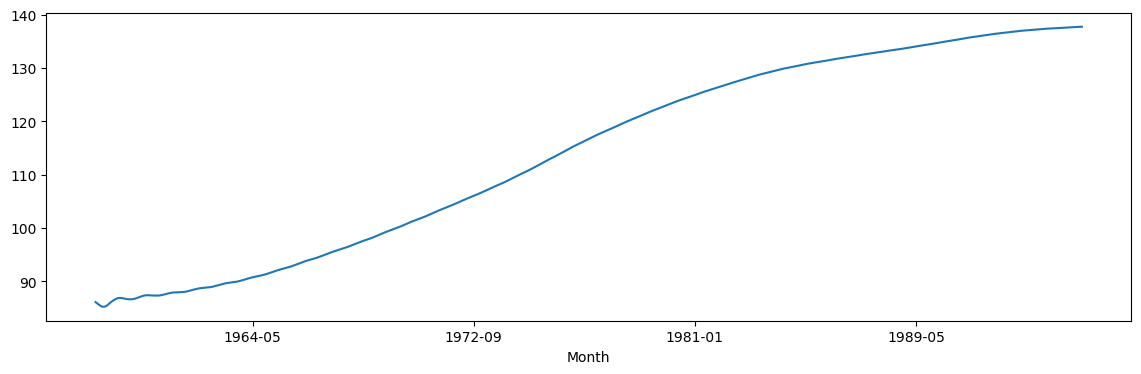

In [164]:
df['Monthly beer production:30 days rolling'].expanding().mean().plot(figsize=(14,4))

# **EWMA- EXPONENTIAL WEIGHTED MOVING AVERAGE**


In [165]:
df['EVM_0.1'] = df['Monthly beer production'].ewm(alpha=0.3,adjust=False).mean()

In [166]:
df['EVM_0.1']

Month
1956-01     93.200000
1956-02     94.040000
1956-03     94.388000
1956-04     89.201600
1956-05     83.711120
              ...    
1995-04    143.956632
1995-05    146.069642
1995-06    141.248749
1995-07    134.574125
1995-08    140.101887
Name: EVM_0.1, Length: 476, dtype: float64

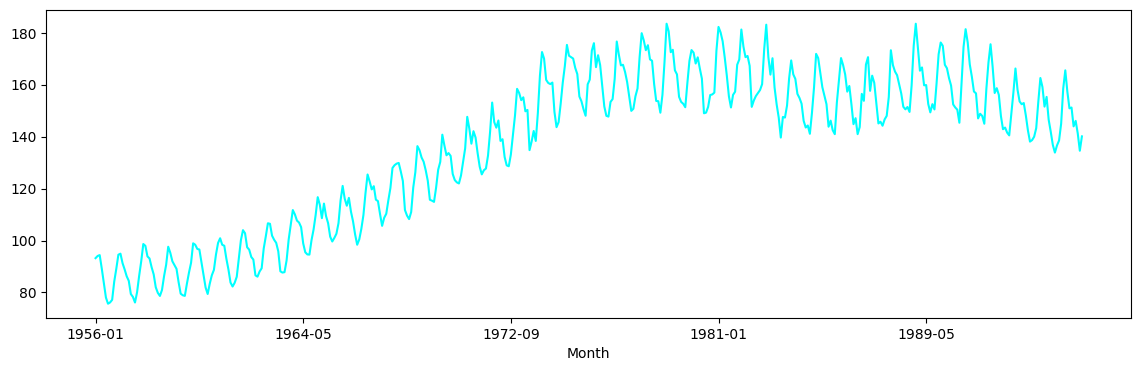

In [167]:
df['EVM_0.1'] = df['Monthly beer production'].ewm(alpha=0.3,adjust=False).mean().plot(figsize=(14,4),color='cyan')

<Axes: xlabel='Month'>

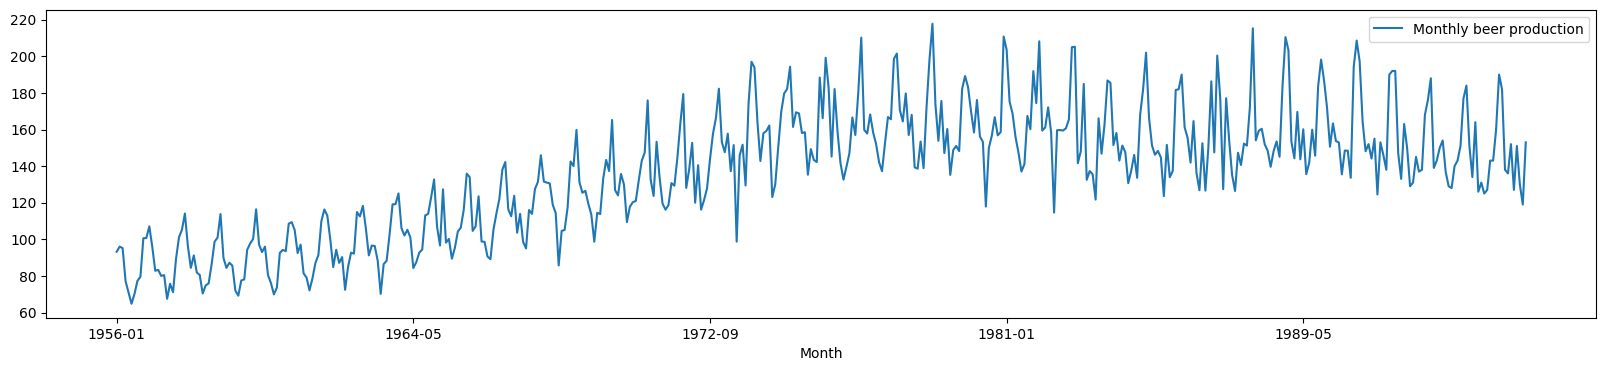

In [168]:
df[['Monthly beer production','EVM_0.1']].plot(figsize=(20,4))

In [169]:
df['EVM_0.1'] =df['Monthly beer production'].ewm(span=5).mean()

<Axes: xlabel='Month'>

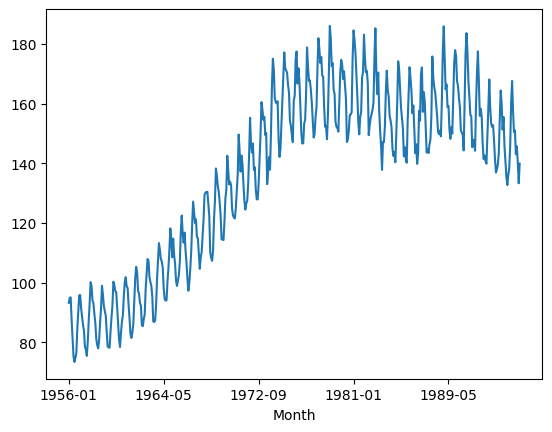

In [170]:
df['EVM_0.1'].plot()

# **ARIMA AND SARIMA MODEL IMPLEMENTATION**

# **WE APLLIED DEAKY FULLER TEST TO CHECK THE GIVEN GRAPH IS STATIONARY OR NOT**

In [171]:
from statsmodels.tsa.stattools import adfuller

In [172]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statics:{}'.format(result[0]))
  print('p-value:{}'.format(result[1]))

  if result[1] <=0.05:
    print("strong evidence regarding Null Hypothesis, reject null hypothesi,Data has no unit root is stationary")
  else:
    print("weak evidence against null hypothesis time series has unit root indicate it is not stationary")

In [173]:
adf_test(df['Monthly beer production'].dropna())

ADF Statics:-2.282661418787577
p-value:0.17762099829132505
weak evidence against null hypothesis time series has unit root indicate it is not stationary


In [174]:
df['Monthly beer production Diff'] = df['Monthly beer production'] - df['Monthly beer production'].shift(12)

In [175]:
adf_test(df['Monthly beer production Diff'].dropna())

ADF Statics:-2.896762477752007
p-value:0.045725774623596484
strong evidence regarding Null Hypothesis, reject null hypothesi,Data has no unit root is stationary


In [176]:
df['Monthly beer production Diff']

Month
1956-01     NaN
1956-02     NaN
1956-03     NaN
1956-04     NaN
1956-05     NaN
           ... 
1995-04     1.0
1995-05    20.0
1995-06     5.0
1995-07    -8.0
1995-08    10.0
Name: Monthly beer production Diff, Length: 476, dtype: float64

In [177]:
df.head(10)

,Monthly beer production,Monthly beer production:30 days rolling,EVM_0.1,Monthly beer production Diff
Month,,,,
1956-01,93.2,NaN,93.200000,NaN
1956-02,96.0,NaN,94.880000,NaN
1956-03,95.2,NaN,95.031579,NaN
1956-04,77.1,NaN,87.583077,NaN
1956-05,70.9,NaN,81.178673,NaN
1956-06,64.8,NaN,75.193684,NaN
1956-07,70.1,NaN,73.390238,NaN
1956-08,77.3,NaN,74.746408,NaN
1956-09,79.5,NaN,76.373256,NaN


# **ARIMA MODEL**

In [178]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# **Non Stationary Seasonal Data Plot no correlation Found init**

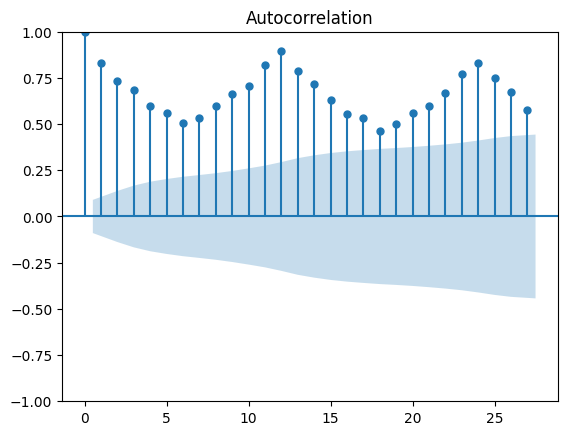

In [179]:
acf = plot_acf(df['Monthly beer production'].dropna())

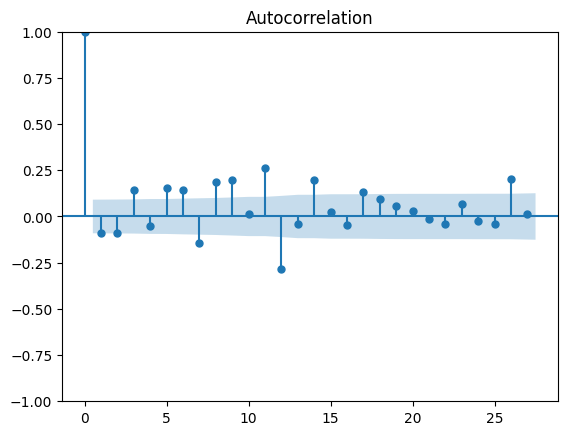

In [180]:
acf = plot_acf(df['Monthly beer production Diff'].dropna())

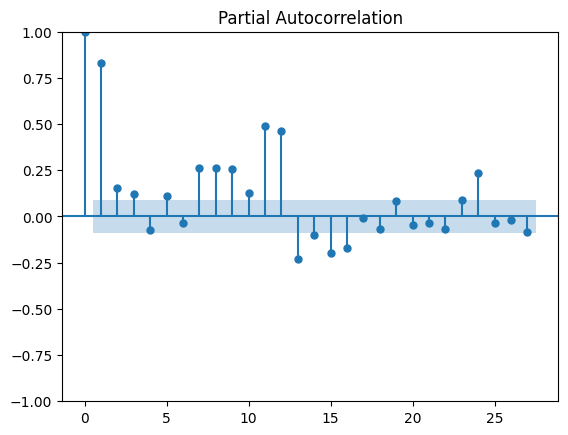

In [181]:
pacf = plot_pacf(df['Monthly beer production'].dropna())

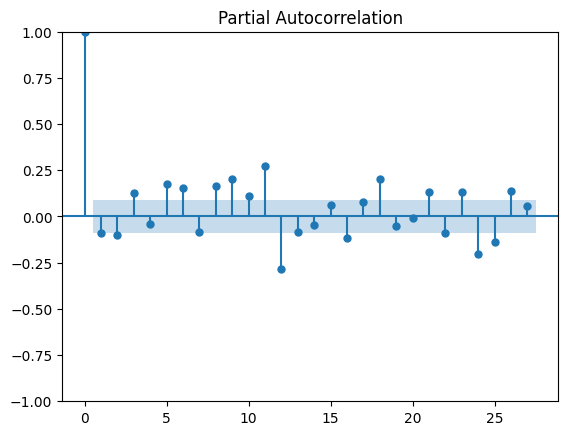

In [182]:
pacf = plot_pacf(df['Monthly beer production Diff'].dropna())

In [183]:
from statsmodels.tsa.arima.model import ARIMA

In [184]:
model_ARIMA = ARIMA(df['Monthly beer production Diff'],order=(10,2,0))

In [185]:
model_ARIMA_fit = model_ARIMA.fit()

In [186]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     Monthly beer production Diff   No. Observations:                  476
Model:                          ARIMA(10, 2, 0)   Log Likelihood               -1811.251
Date:                          Fri, 25 Aug 2023   AIC                           3644.501
Time:                                  14:58:22   BIC                           3690.274
Sample:                              01-01-1956   HQIC                          3662.503
                                   - 08-01-1995                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7858      0.034    -52.020      0.000      -1.853      -1.719
ar.L2         -2.4463      0.077    -31.963      0.000      -2.596      -2.296
ar.L3         -2.7576      0.114    -24.281      0.000      -2.980      -2.535
ar.L4         -2.8690      0.144    -19.879      0.000      -3.152      -2.586
ar.L5         -2.7652      0.159    -17.408      0.000      -3.076      -2.454
ar.L6         -2.4426      0.155    -15.767      0.000      -2.746      -2.139
ar.L7         -2.1225      0.132    -16.049      0.000      -2.382      -1.863
ar.L8         -1.6669      0.102    -16.284      0.000      -1.868      -1.466
ar.L9         -1.0550      0.065    -16.308      0.000      -1.182      -0.928
ar.L10        -0.5378      0.034    -15.957      0.000      -0.604      -0.472
sigma2       136.6740      7.323     18.663      0.000     122.320     151.028
===================================================================================
Ljung-Box (L1) (Q):                   7.21   Jarque-Bera (JB):                47.92
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [187]:
pred = model_ARIMA_fit.predict()

In [188]:
pred

1956-01-01     0.000000
1956-02-01     0.000000
1956-03-01     0.000000
1956-04-01     0.000000
1956-05-01     0.000000
                ...    
1995-04-01    13.070534
1995-05-01     2.909741
1995-06-01     0.415588
1995-07-01     2.888777
1995-08-01     3.282242
Freq: MS, Name: predicted_mean, Length: 476, dtype: float64

# **PLOT** **ARIMA** **MODEL**

<Axes: ylabel='Density'>

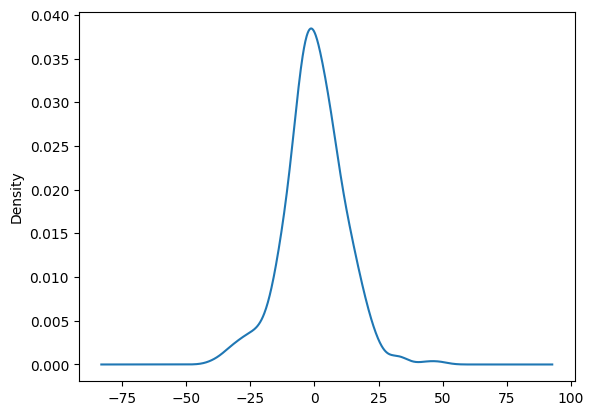

In [189]:
model_ARIMA_fit.resid.plot(kind='kde')

In [190]:
df['predicted_ARIMA'] = pred

# **PREDICTION OF MONTHLY BEER PRODUCTION IN AUSTRIA BY PLOT ARIMA MODEL**

<Axes: xlabel='Month'>

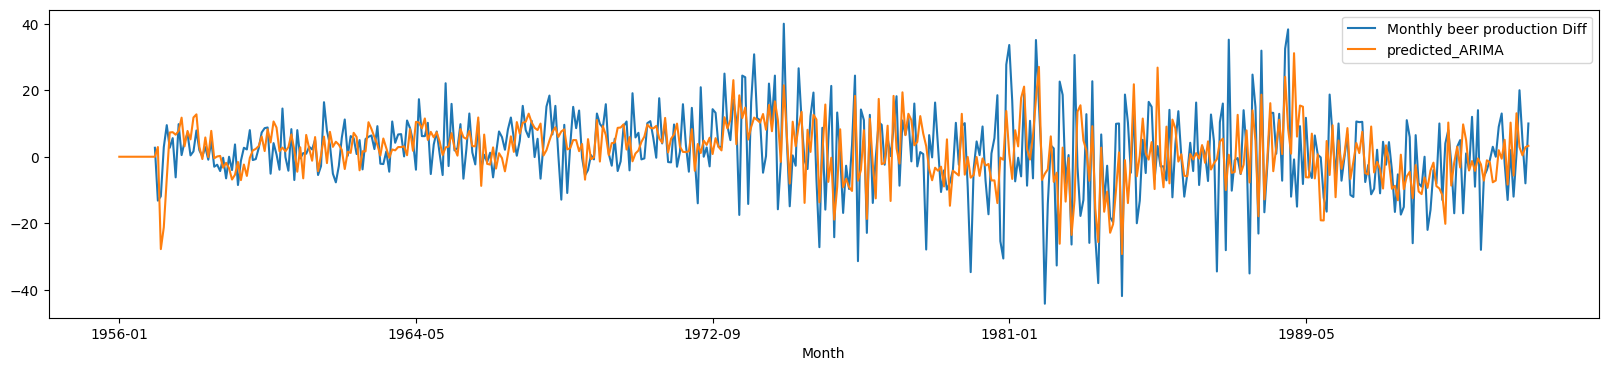

In [191]:
df[['Monthly beer production Diff','predicted_ARIMA']].plot(figsize=(20,4))

# **SARIMA MODEL IMPLEMENTATION**

In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [193]:
model_SARIMAX = SARIMAX(df['Monthly beer production'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [194]:
model_SARIMAX_fit = model_SARIMAX.fit()

In [195]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Monthly beer production   No. Observations:                  476
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood               -1770.645
Date:                             Fri, 25 Aug 2023   AIC                           3559.290
Time:                                     14:58:26   BIC                           3596.549
Sample:                                 01-01-1956   HQIC                          3573.957
                                      - 08-01-1995                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1391      0.024     -5.732      0.000      -0.187      -0.092
ar.L2          0.1541      0.026      5.890      0.000       0.103       0.205
ar.L3          0.9096      0.024     37.604      0.000       0.862       0.957
ma.L1          0.0686      0.041      1.664      0.096      -0.012       0.149
ma.L2         -0.2144      0.045     -4.791      0.000      -0.302      -0.127
ma.L3         -0.9072      0.029    -31.616      0.000      -0.963      -0.851
ma.L4          0.0468      0.042      1.125      0.261      -0.035       0.128
ma.L5          0.2771      0.044      6.289      0.000       0.191       0.363
sigma2       121.7313      6.765     17.994      0.000     108.472     134.991
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                35.23
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               3.64   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
df['Predicted_SARIMA'] = pred

<Axes: ylabel='Density'>

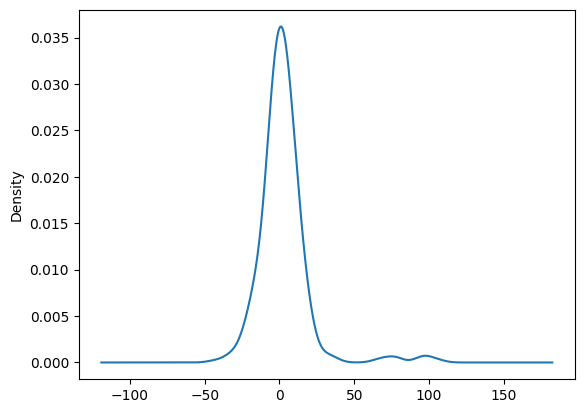

In [197]:
model_SARIMAX_fit.resid.plot(kind='kde')

<Axes: xlabel='Month'>

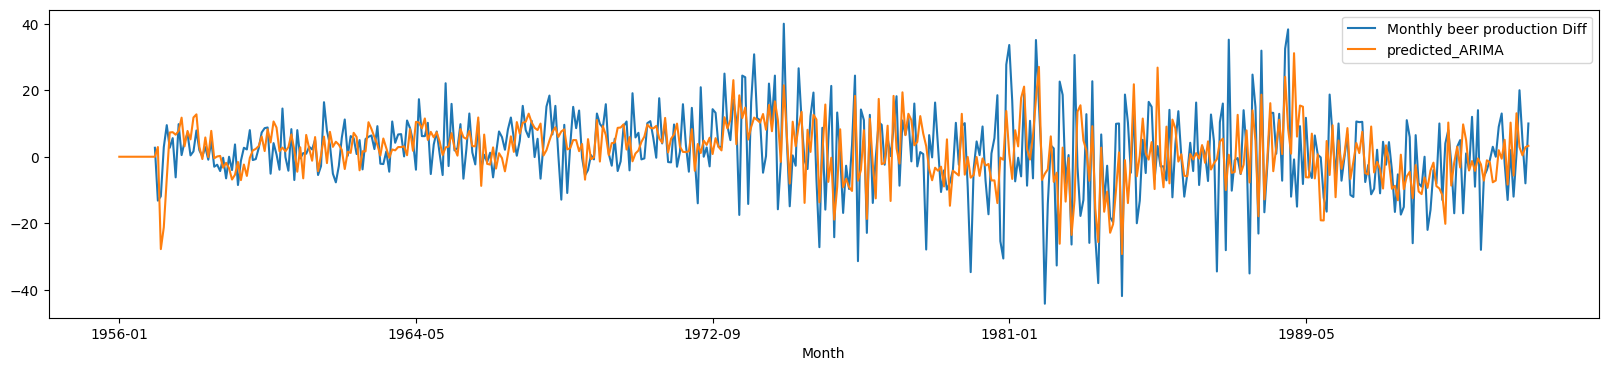

In [198]:
df[['Monthly beer production Diff','predicted_ARIMA']].plot(figsize=(20,4))

# **BETTER PREDICTION OF MONTHLY BEER SALES IN AUSTRALIA USING SARIMA MODEL**

<Axes: xlabel='Month'>

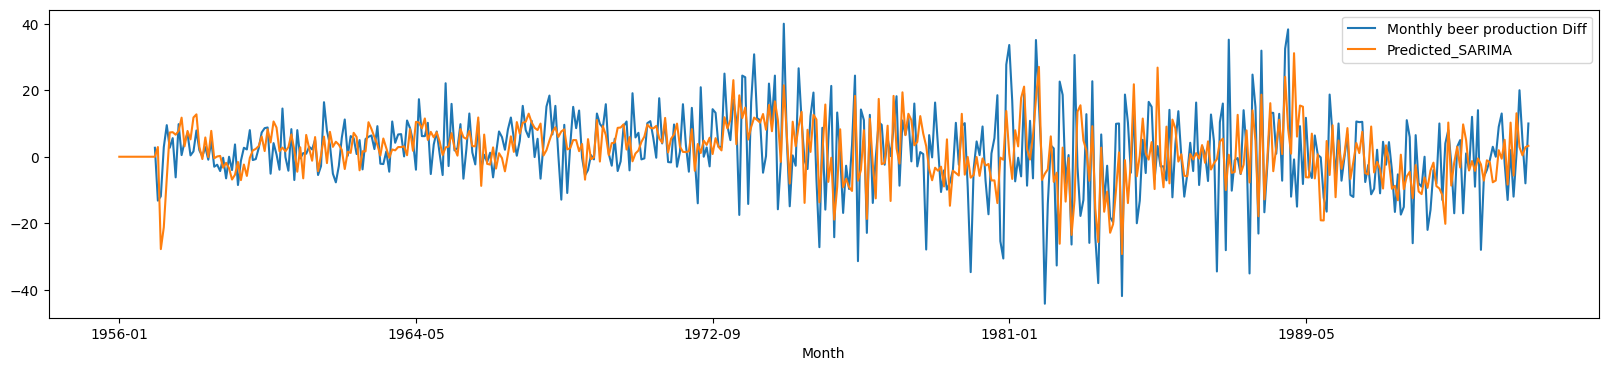

In [201]:
df[['Monthly beer production Diff','Predicted_SARIMA']].plot(figsize=(20,4))

<Axes: xlabel='Month'>

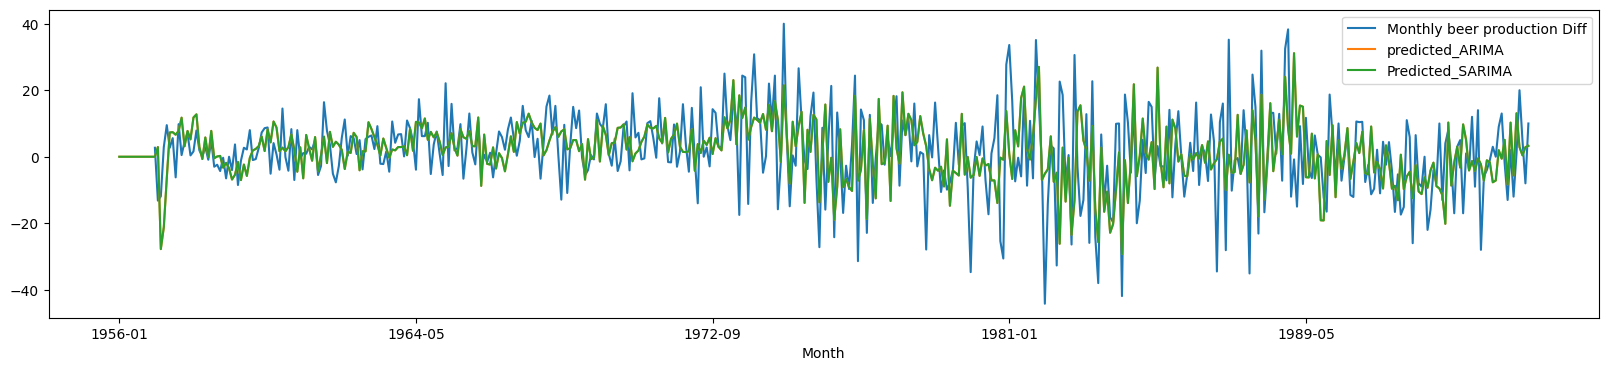

In [199]:
df[['Monthly beer production Diff','predicted_ARIMA','Predicted_SARIMA']].plot(figsize=(20,4))